In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('Darknet.csv')

In [61]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [62]:
#visualize the labels
df['Label'].value_counts()

Label
Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: count, dtype: int64

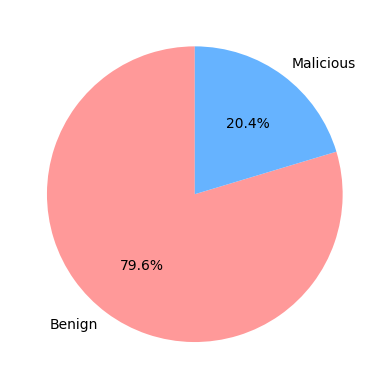

In [63]:
#create a pie chart of the labels
import matplotlib.pyplot as plt
labels = ['Benign', 'Malicious']
sizes = [df['Label'].value_counts()[0], df['Label'].value_counts()[1]]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [64]:
# Encode the labels to binary format
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'].replace(['Non-Tor', 'NonVPN'], 'Normal').replace(['Tor', 'VPN'], 'Malicious'))

In [65]:
#look as unique values in Label.1 column
types_of_traffic = df['Label.1'].unique()

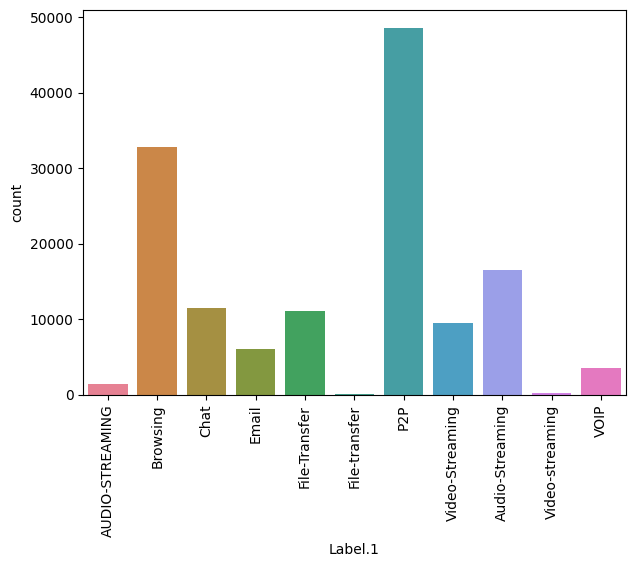

In [66]:
#plot the types of traffic in the dataset and rotate the axis labels
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(ax=ax, x='Label.1', data=df,hue='Label.1')
ax.set_xticklabels(types_of_traffic, rotation=90)
plt.show()

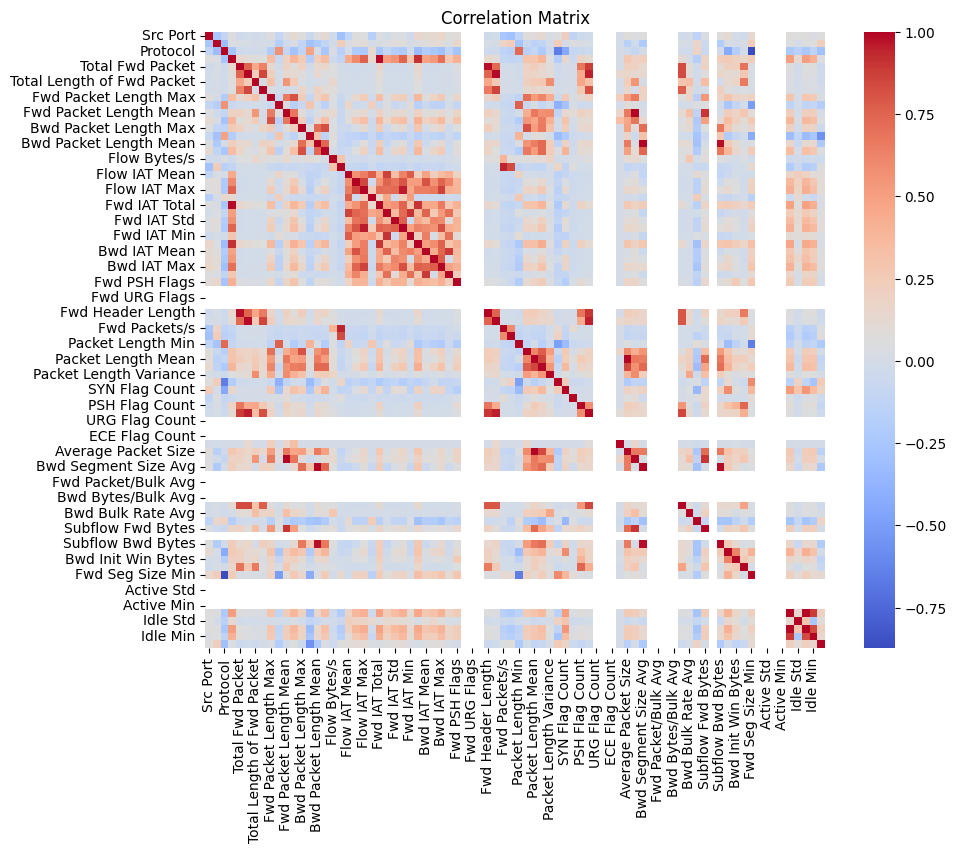

In [67]:
import seaborn as sns
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [68]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

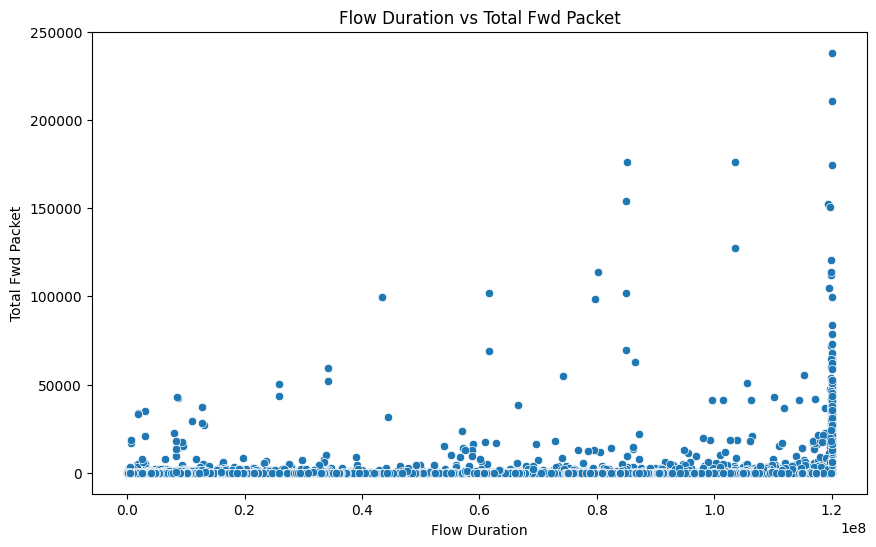

In [69]:
# 1. Scatter Plot Example: Flow Duration vs Total Fwd Packet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flow Duration', y='Total Fwd Packet', data=df)
plt.title('Flow Duration vs Total Fwd Packet')
plt.show()

Flow Duration and Total Packets (Fwd and Bwd): Longer flows are likely to have more packets.

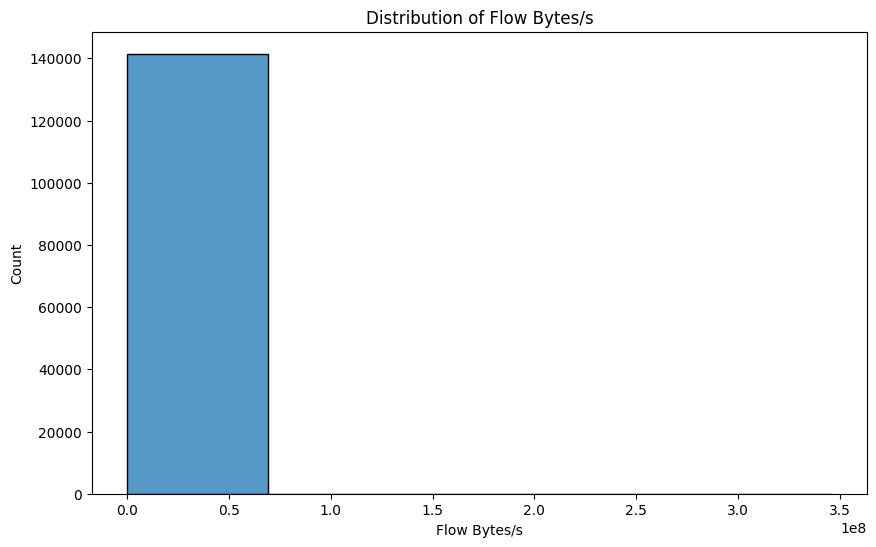

In [70]:
# Histogram Example: Distribution of Flow Bytes/s
plt.figure(figsize=(10, 6))
sns.histplot(df['Flow Bytes/s'], bins=5)
plt.title('Distribution of Flow Bytes/s')
plt.show()

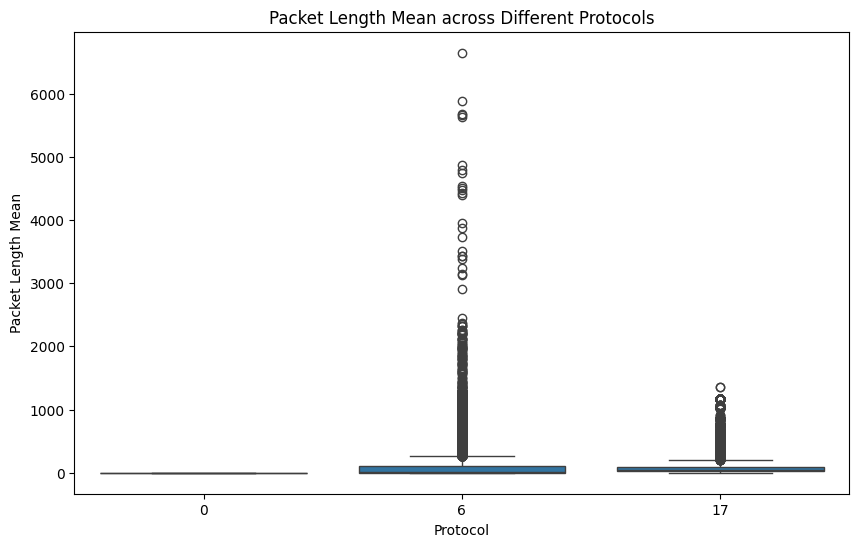

In [71]:
#Box Plot Example: Packet Lengths across different Protocols
plt.figure(figsize=(10, 6))
sns.boxplot(x='Protocol', y='Packet Length Mean', data=df)
plt.title('Packet Length Mean across Different Protocols')
plt.show()

In [72]:
# Scatter Plot Functions
def scatter_plot(x, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(title)
    plt.show()

# Stacked Bar Chart Function
def stacked_bar_chart(x, y, title):
    data = df.groupby(x)[y].value_counts(normalize=True).unstack()
    data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.show()


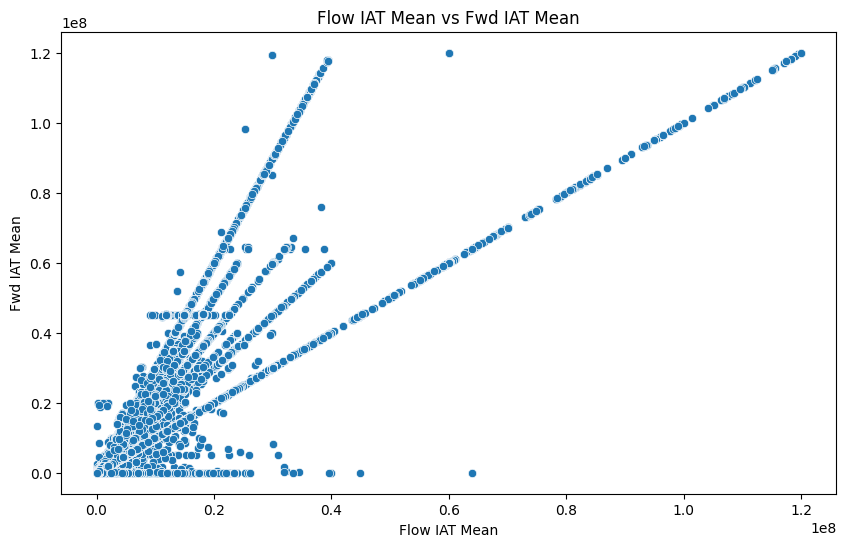

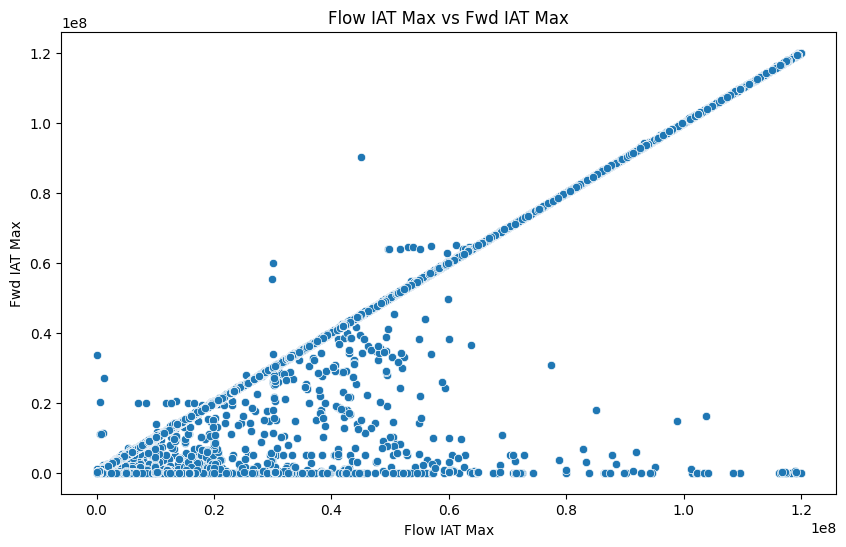

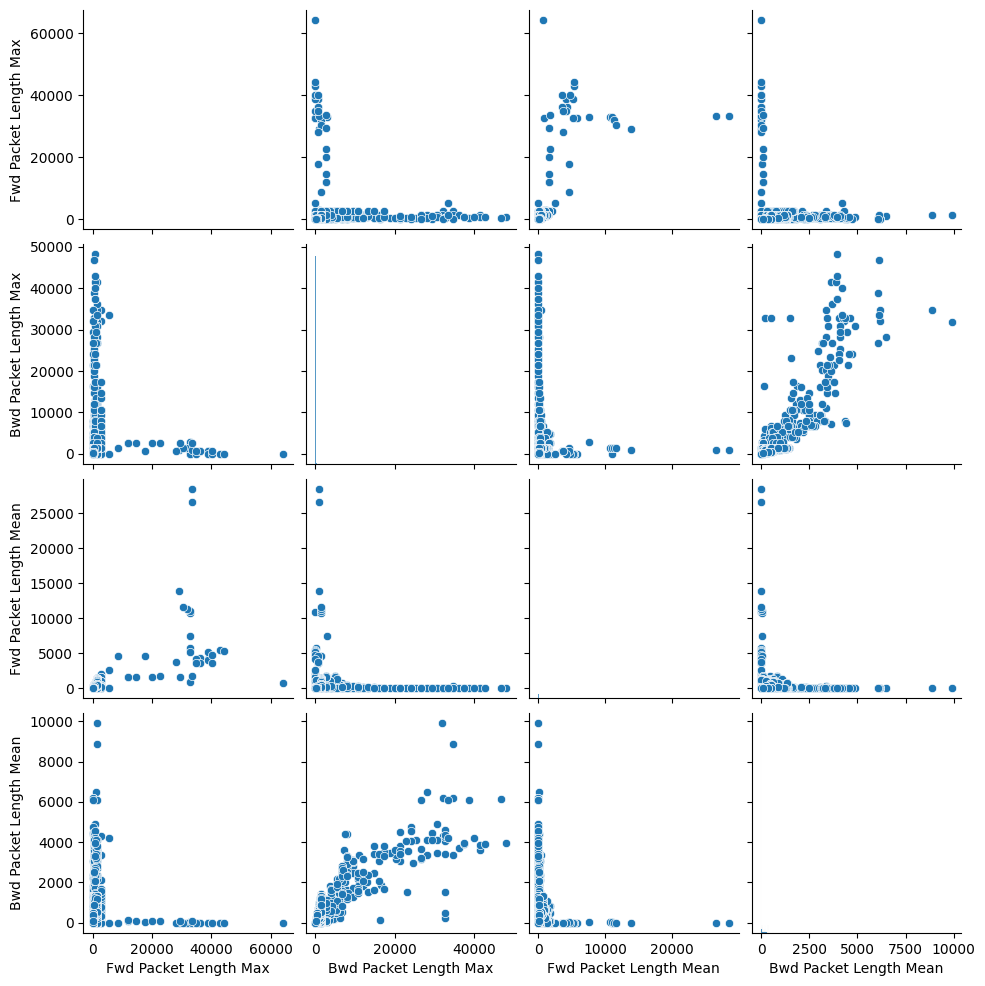

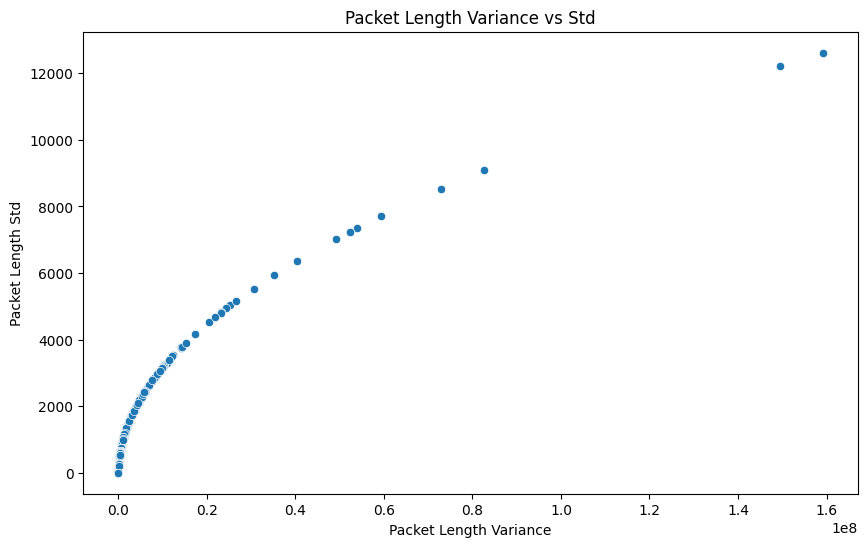

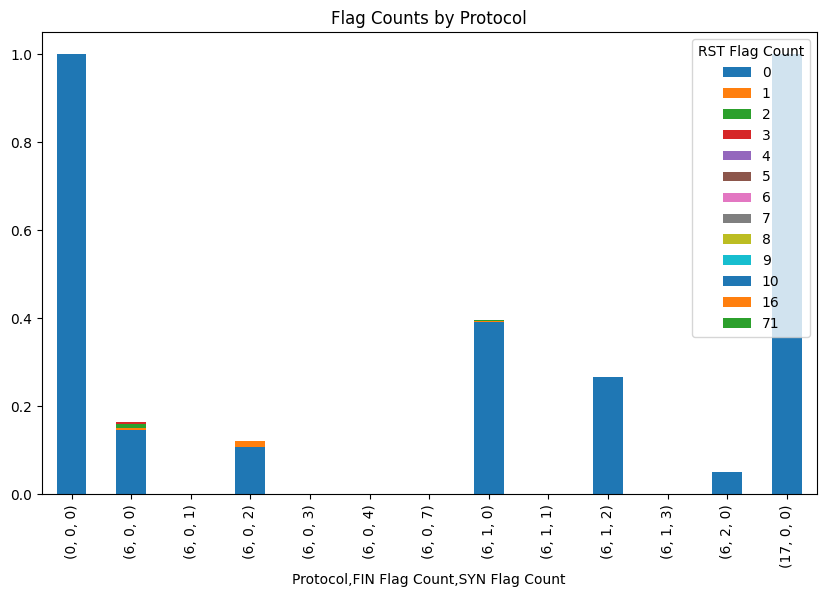

In [73]:
# 1. Flow IAT and Fwd/Bwd IAT Stats
scatter_plot('Flow IAT Mean', 'Fwd IAT Mean', 'Flow IAT Mean vs Fwd IAT Mean')
scatter_plot('Flow IAT Max', 'Fwd IAT Max', 'Flow IAT Max vs Fwd IAT Max')
# Repeat for other IAT comparisons

# 2. Fwd and Bwd Packet Length Stats
sns.pairplot(df[['Fwd Packet Length Max', 'Bwd Packet Length Max',
                 'Fwd Packet Length Mean', 'Bwd Packet Length Mean']])
plt.show()

# 3. Packet Length Variance and Std
scatter_plot('Packet Length Variance', 'Packet Length Std', 'Packet Length Variance vs Std')

# 4. Flag Counts and Protocol
stacked_bar_chart('Protocol', ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count'], 'Flag Counts by Protocol')


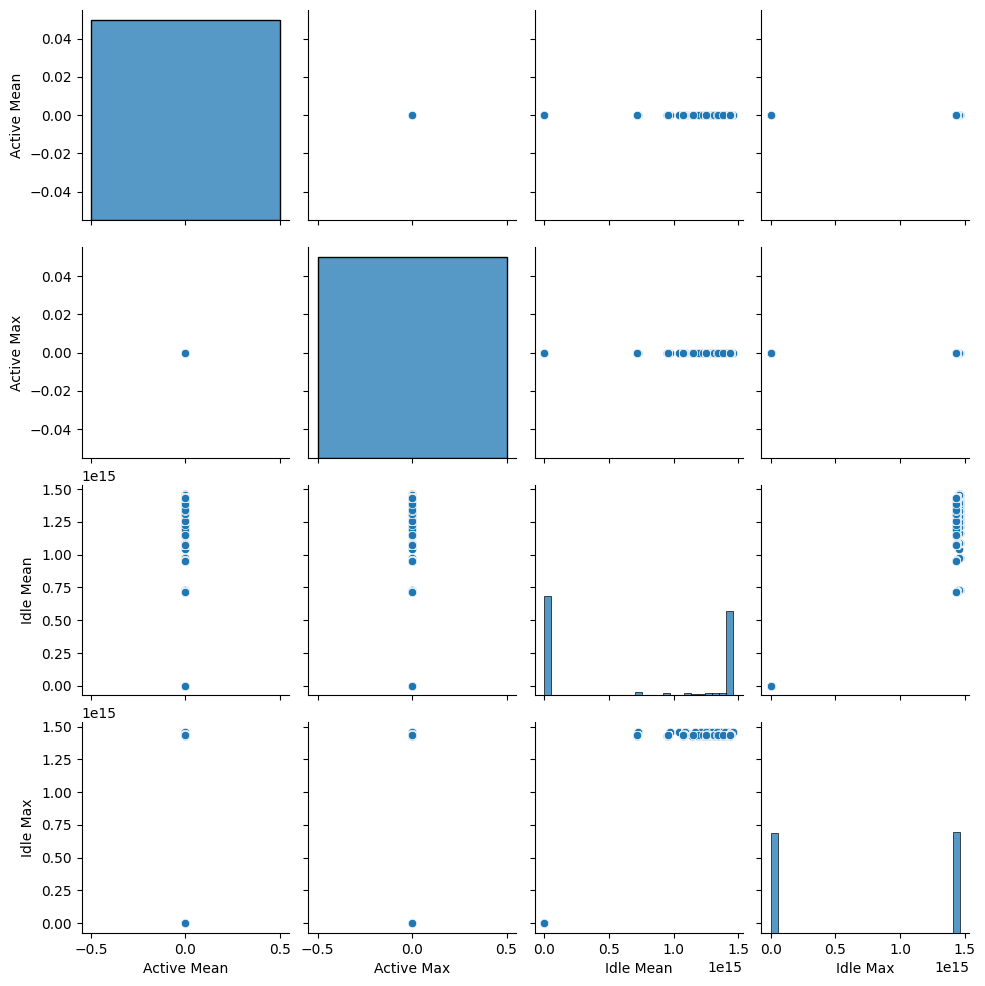

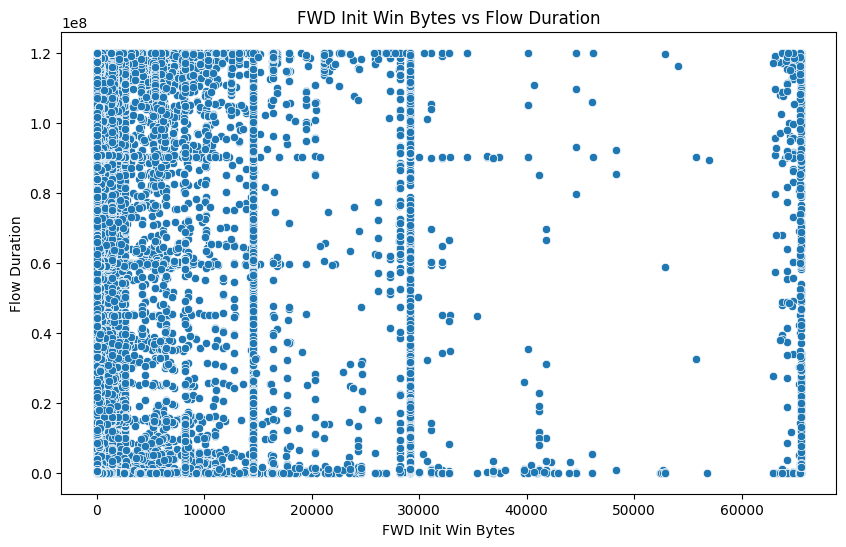

In [74]:
# 6. Active and Idle Time Stats
sns.pairplot(df[['Active Mean', 'Active Max', 'Idle Mean', 'Idle Max']])
plt.show()

# 8. FWD/BWD Init Win Bytes and Flow Duration
scatter_plot('FWD Init Win Bytes', 'Flow Duration', 'FWD Init Win Bytes vs Flow Duration')

In [75]:
import numpy as np
# Select relevant features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_features].drop(['Src Port', 'Dst Port', 'Protocol'], axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

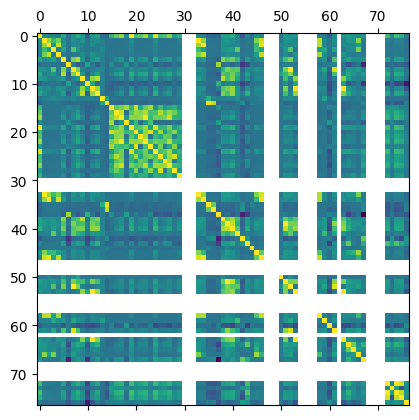

In [76]:
#create a correlation matrix and plot it
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)
plt.show()


In [77]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Label'], test_size=0.3, random_state=42, stratify=df['Label'])

In [78]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [91]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/100
2477/2477 [==============================] - 3s 969us/step - loss: 9.7625e-04 - accuracy: 0.9999 - val_loss: 0.0020 - val_accuracy: 0.9999
Epoch 2/100
2477/2477 [==============================] - 2s 944us/step - loss: 8.8286e-04 - accuracy: 0.9999 - val_loss: 0.0014 - val_accuracy: 0.9999
Epoch 3/100
2477/2477 [==============================] - 2s 958us/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0014 - val_accuracy: 0.9999
Epoch 4/100
2477/2477 [==============================] - 2s 934us/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0013 - val_accuracy: 0.9999
Epoch 5/100
2477/2477 [==============================] - 2s 942us/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 2.0976e-04 - val_accuracy: 0.9999
Epoch 6/100
2477/2477 [==============================] - 2s 943us/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 6.1047e-04 - val_accuracy: 0.9999
Epoch 7/100
2477/2477 [==============================] - 2s 945us/step - loss: 5.6008e-04 - accuracy: 

In [80]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

1327/1327 [==============================] - 1s 515us/step - loss: 1.0160e-07 - accuracy: 1.0000
Test accuracy: 1.0


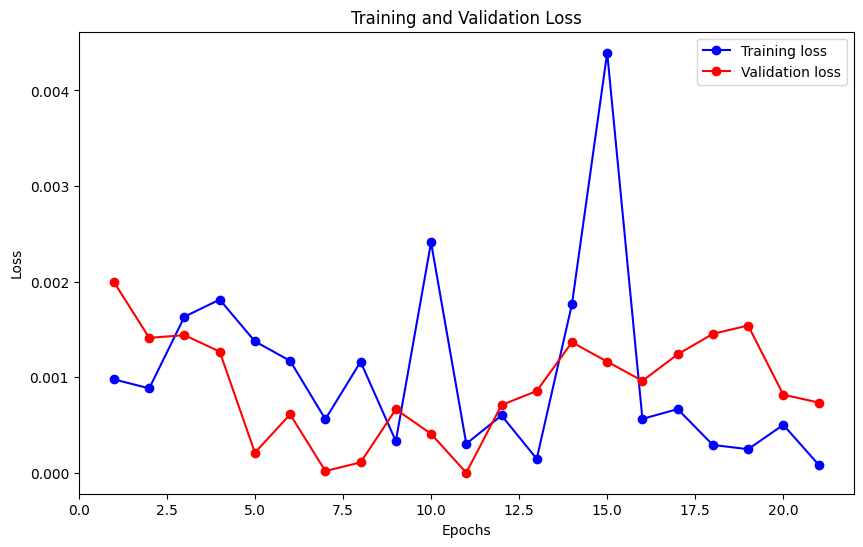

In [92]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Extract the loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range for the number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [82]:
#test with holdout data
df = pd.read_csv('holdout_set_mixed.csv')
df['Label'] = le.transform(df['Label'].replace(['Non-Tor', 'NonVPN'], 'Normal').replace(['Tor', 'VPN'], 'Malicious'))
X = df[numeric_features].drop(['Src Port', 'Dst Port', 'Protocol'], axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
X_scaled = scaler.transform(X)
y = df['Label']
loss, accuracy = model.evaluate(X_scaled, y)
print(f'Holdout accuracy: {accuracy}')

1/1 [==============================] - 0s 13ms/step - loss: 6.0270e-16 - accuracy: 1.0000
Holdout accuracy: 1.0


In [ ]:
#save the model
model.save('darknet_model.h5')